# 提交方式

1. 本项目为单人作业，无需撰写Report。基于notebook已提供的代码，补充"#Code"后的代码并回答问题。
2. 请直接提交ipynb文件，命名为StudentID_Name (例如xxxxxxxxxxxx_张三)
3. 请勿抄袭。

# 数据集

Medical Cost Personal Datasets是 Brett Lantz 所著的《Machine Learning with R》一书中使用的医疗保险记录数据集。共包括以下信息：

age:被保险人的年龄

sex: 被保险人的性别，male或female

bmi: 被保险人的身高体重比的客观体重指数（$kg/m^2$），理想为18.5至24.9

children: 被保险人的子女数量

smoker: 被保险人是否吸烟，yes或no

region: 被保险人在美国的居住区域，northeast, southeast, southwest, northwest.

charges: 年度保险费用

# 导入所需库

在这个项目中，我们将使用 Medical Cost Personal Datasets 来构建和评估三种不同的机器学习模型：线性回归、多层感知机（MLP）和卷积神经网络（CNN）。我们的目标是预测个人的医疗费用。

本文件可以使用jupyter notebook或Google Colab打开。请确保运行环境是Python3。如果你使用了Google Colab，请确保选择了GPU加速。

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,chi2,f_regression
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 导入数据集

如果使用Google Colab，请将数据文件上传到会话存储空间；如使用其他方式，请修改路径。

In [73]:
dataset = pd.read_csv("./insurance.csv")

In [74]:
dataset.shape

(1338, 7)

In [75]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 数据清理

在继续其他工作之前，我们必须对数据进行一些清理。清理是数据分析中非常重要的部分，因为结果的准确性在很大程度上取决于数据的质量。如果没有高质量的数据，就不可能预测准确的结果。

我们将在这里检查数据是否有缺失值，并尝试借助各种数据清理技术来估算缺失值，这将涉及使用输入或删除不必要的数据。

从可用信息中删除数据取决于某个特征丢失了多少数据，因为如果我们要移动大量数据，那么剩下的数据量太少，这将导致模型不太准确。

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


从数据集的基本信息中，我们可以看到数据集有2个浮点型特征、2个整型特征和3个对象数据类型特征。由于统计模型适用于数值数据，因此在后期阶段需要将对象数据类型的特征更改为数值。

该信息表明它没有空值，因此这意味着我们可以继续进行数据处理的进一步阶段，而不必担心空值影响数据集的质量。

## 分割数据集

在本次回归项目中，charges是目标变量，其他变量可以作为输入特征。请使用train_test_split()函数，将数据集分成75%的训练集和25%的测试集。函数的使用方法可参考[此处](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 。

In [77]:
# Split dataset
# Code
trainset, testset = train_test_split(dataset, train_size = 0.75, random_state = 42)


In [78]:
# View the first several lines of the trainset
# Code

trainset.head()

,age,sex,bmi,children,smoker,region,charges
693,24,male,23.655,0,no,northwest,2352.96845
1297,28,female,26.510,2,no,southeast,4340.44090
634,51,male,39.700,1,no,southwest,9391.34600
1022,47,male,36.080,1,yes,southeast,42211.13820
178,46,female,28.900,2,no,southwest,8823.27900


## 将文本特征转化为数值特征

上文中可以看到，sex、smoker和region的特征类型是Object，这意味着我们需要将它转化为能够输入模型的数值。我们可以尝试使用最基本的[Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)和[One Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)方法来对特征进行编码。  。

In [79]:
# Convert the features of sex and smoker to 0/1
# Code
le_sex, le_smoker = LabelEncoder(), LabelEncoder()
le_sex.fit(["female", "male"])
le_smoker.fit(["no", "yes"])
trainset.sex, testset.sex = le_sex.transform(trainset.sex), le_sex.transform(testset.sex)
trainset.smoker, testset.smoker = le_smoker.transform(trainset.smoker), le_smoker.transform(testset.smoker)


In [80]:
# Convert the features of region
# Code
trainset = trainset.join(pd.get_dummies(trainset.region, prefix='region').astype(float))
trainset.drop('region', axis=1, inplace=True)
testset = testset.join(pd.get_dummies(testset.region, prefix='region').astype(float))
testset.drop('region', axis=1, inplace=True)

In [81]:
# The final trainset might be like the following table.
# Code
y_train = trainset.charges
X_train = trainset.drop('charges', axis=1)
y_test = testset.charges
X_test = testset.drop('charges', axis=1)
X_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
693,24,1,23.655,0,0,0.0,1.0,0.0,0.0
1297,28,0,26.510,2,0,0.0,0.0,1.0,0.0
634,51,1,39.700,1,0,0.0,0.0,0.0,1.0
1022,47,1,36.080,1,1,0.0,0.0,1.0,0.0
178,46,0,28.900,2,0,0.0,0.0,0.0,1.0


现在数据集和基本特征都已经准备好了。现在，我们使用线性回归创建一个预测模型，而不对数据集进行任何更改。之后，我们将进入特征选择阶段以改进特征。我们将评估使用改进后的数据集是否对线性回归模型的预测结果有所改善。


# 线性回归模型

在scikit-learn中，线性回归模型可通过sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)来创建。这个类的使用可参阅[此处](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 。

In [82]:


l_reg = LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [83]:
l_reg.score(X_test,y_test)

0.7672642952734358

这里的score返回的是决定系数，可用于评估回归模型的效果。计算方法可参阅[此处](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)。此外，mean squared error[(MSE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)也是回归模型的重要评估标准。

In [84]:
y_pred_lr = l_reg.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_lr))

Linear Regression MSE: 35117755.73613631


我们还可以可视化预测的结果。散点越接近黑色虚线，表明预测结果越准确。

In [85]:
def view(y_test,y_pred):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title('LinearRegressor: y_test vs y_pred')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()

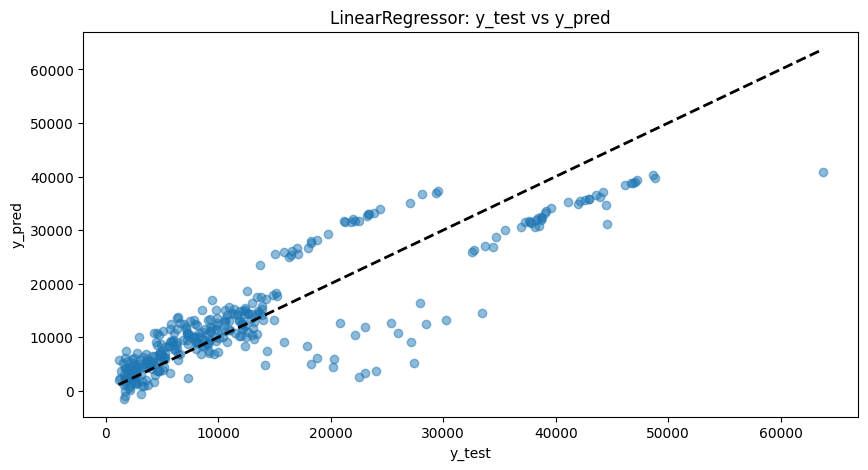

In [86]:
view(y_test, y_pred_lr)

# 特征选择

以上的线性回归模型得到的结果还算不错。但为了进一步提升预测的结果，我们还需要通过特征选择及特征工程手段进一步提升特征的可用性。

热力图在实际中常用于展示一组变量的相关系数矩阵，在展示列联表的数据分布上也有较大的用途，通过热力图我们可以非常直观地感受到数值大小的差异状况。

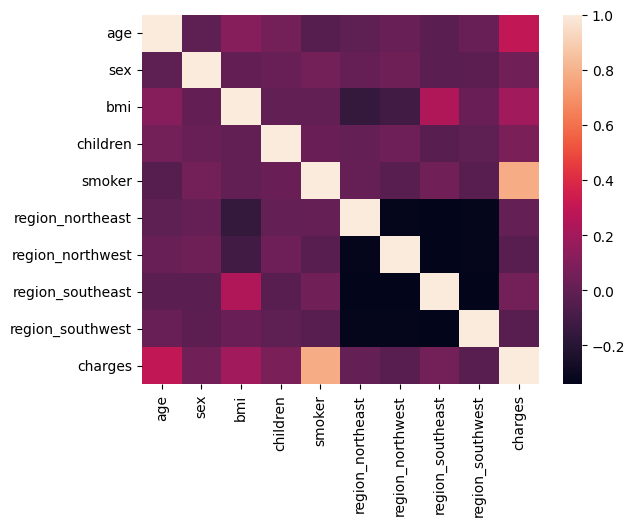

In [87]:
sns.heatmap(pd.concat([X_train,y_train],axis=1).corr())
plt.show()

Q1：通过以上热力图，你能够获得哪些信息？请列出不少于两条信息并给出你的解释。

Answer:

* `smoker` 特征与费用之间有较强的正相关性（图中对应点呈橙色），说明吸烟者倾向于需支付更高的费用，推测出吸烟者产生健康问题的概率较高，吸烟有害健康。
* `age` 特征与费用之间也有一定的正相关性（图中对应点呈红色），说明年长者倾向于需支付更高的费用。
* `region_southeast` 与 `bmi` 特征之间可能存在一定的相关性（图中对应点呈红色），推测该地区肥胖者可能较多。
* 以 `region` 为前缀的各个特征之间呈完全负相关（对应点呈黑色），因为这些特征是经过 one-hot 编码得到的，其一为 1 说明其他一定为 0。

SelectKBest()可以根据评分，选取的评分较高的k个特征。可参阅https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html 。请打印每个特征的评分。

In [50]:
# Use SelectKBest() to print the scores of each feature
# Code

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train, y_train)

scores = selector.scores_

features = list(X_train.columns)
scores_list = list(zip(features, scores))

for feature, score in scores_list:
    print(f"{feature}: {score}")

age: 94.3099609357593
sex: 1.8848761995652916
bmi: 39.917880354440946
children: 6.418911659236098
smoker: 1575.5342360055295
region_northeast: 0.029925635812111294
region_northwest: 0.8999051992832484
region_southeast: 2.8161179284204994
region_southwest: 0.8644072739341252


In [88]:
X_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
693,24,1,23.655,0,0,0.0,1.0,0.0,0.0
1297,28,0,26.510,2,0,0.0,0.0,1.0,0.0
634,51,1,39.700,1,0,0.0,0.0,0.0,1.0
1022,47,1,36.080,1,1,0.0,0.0,1.0,0.0
178,46,0,28.900,2,0,0.0,0.0,0.0,1.0


Q2: 从KBest的分数中你能得到什么结论？

Answer:

`smoker` 特征的评分极高，说明它与目标变量（费用）有非常强的关联，是决定费用的关键因素——吸烟者保险费用可能普遍较高；`age`、`bmi` 特征的评分比较高，说明其与保险费用有一定的相关性，`children`、`sex` 特征与保险费用的相关性较低。除东南地区外，其余区域特征的评分都较低，与保险费用相关性较弱，可以从特征中剔除。

现在我们将仅考虑使用前5列和东南列用于预测目的。我们将针对这些列再次训练模型，看看基于这些改进的特征能有多少差异。

In [89]:
# Delete columns northeast,northwest and southwest
# Code

X_train = X_train.drop('region_northeast', axis=1).drop('region_northwest', axis=1).drop('region_southwest', axis=1)
X_test = X_test.drop('region_northeast', axis=1).drop('region_northwest', axis=1).drop('region_southwest', axis=1)

0.7661521850077775


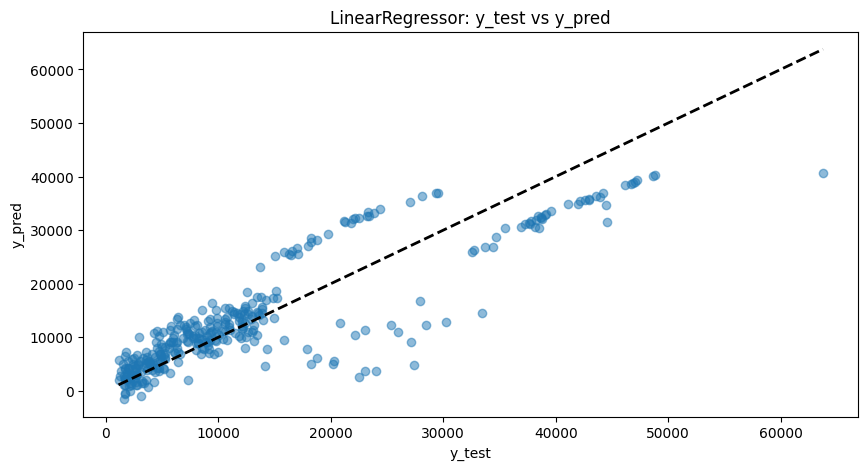

In [90]:
# Use new features to predict charges, then print the score
# Code

l_reg.fit(X_train,y_train)
print(l_reg.score(X_test,y_test))

y_pred_lr = l_reg.predict(X_test)
view(y_test, y_pred_lr)

Q3: 经过特征选择后的实验结果有什么不同？请给出你的解释。

Answer：几乎没有不同，移除的特征本身不是相关性较高的特征，对模型预测能力几乎没有影响。同时，线性回归是一个相对简单的模型，同时被去除的特征虽然评分较低，但仍可能包括一些有用信息，所以 $R^2$ 轻微下降。

# 特征工程

我们还可以尝试一些特征工程并尝试引入一些特征，以获得更有用的数据。

特征工程是在现有特征的基础上创建新的特征，以便我们可以获得更多的数据信息，从而帮助我们预测数据。这个过程涉及更多的背景理解。我们对背景了解得越多，我们就越容易创建有用的特征。我们可以尝试多种特征组合，看看每种组合的效果如何。

基于特征组合和对保险领域的知识背景，我们可以生成以下几个功能。

首先可以将年龄以30岁和60岁为界，转化成年轻，中年和老年三个值。

In [54]:
#Transform exact age to three values. Here 1 means 'Young', 2 means 'Middle Aged' and 3 means 'Old Age'
def age_transform(ages):
    transformed_list = []
    for age in ages:
        if age <= 30:
            transformed_list.append(1)
        elif age < 60:
            transformed_list.append(2)
        else:
            transformed_list.append(3)

    return transformed_list

在原有的数据集的末尾添上基于age生成的新的列，名为'life stage'。

In [55]:
#Adding a new feature 'life_stage' based on persons age
X_train['life_stage'] = age_transform(X_train.age.values)
X_test['life_stage'] = age_transform(X_test.age.values)

In [56]:
X_train.head()

,age,sex,bmi,children,smoker,region_southeast,life_stage
693,24,1,23.655,0,0,0.0,1
1297,28,0,26.510,2,0,1.0,1
634,51,1,39.700,1,0,0.0,2
1022,47,1,36.080,1,1,1.0,2
178,46,0,28.900,2,0,0.0,2


同样地，针对bmi我们也可以以18.5，25，30为界将bmi分为体重较低、正常、体重较高、肥胖四个值。

In [57]:
def bmi_category(bmi):
    transformed_list = []
    #Here 1 means 'Under weight', 2 means 'Normal' , 3 means 'Over Weight' and 4 means 'Obese'
    for index in bmi:
        if index < 18.5:
            transformed_list.append(1)
        elif index >= 18.5 and index <= 24.9:
            transformed_list.append(2)
        elif index >= 25 and index <= 29.9:
            transformed_list.append(3)
        else:
            transformed_list.append(4)

    return transformed_list

我们不再开启新的列，而是将原有的bmi列转为bmi的分类的四个值。

In [58]:
#We'll shift the bmi values to it's corresponding category
X_train['bmi'] = bmi_category(X_train.bmi.values)
X_test['bmi'] = bmi_category(X_test.bmi.values)


In [59]:
X_train.head()

,age,sex,bmi,children,smoker,region_southeast,life_stage
693,24,1,2,0,0,0.0,1
1297,28,0,3,2,0,1.0,1
634,51,1,4,1,0,0.0,2
1022,47,1,4,1,1,1.0,2
178,46,0,3,2,0,0.0,2


依据先验知识，我们可以计算被保险人的健康风险。这里计算方法已给出。

In [60]:
def calculate_risk(life_stage,smoker,bmi):
    transformed_list = []
    #Here from 1 till 6 we've increasing risk based on life stage, smoker and bmi
    counter = 0
    if len(life_stage) == len(smoker):
        for stage,smoke in zip(life_stage,smoker):
            if (stage == 1) and (smoke == 1) and (bmi[counter] == 2):
                transformed_list.append(1)
            elif (stage == 1) and (smoke == 1) and (bmi[counter] == 3):
                transformed_list.append(2)
            elif (stage == 2) and (smoke == 1) and (bmi[counter] == 2):
                transformed_list.append(3)
            elif (stage == 2) and (smoke == 1) and (bmi[counter] == 3):
                transformed_list.append(4)
            elif (stage == 3) and (smoke == 1) and (bmi[counter] == 2):
                transformed_list.append(5)
            elif (stage == 3) and (smoke == 1) and (bmi[counter] == 3):
                transformed_list.append(6)
            else:
                transformed_list.append(0)
            counter=counter+1

    return transformed_list

在数据集的末尾添加'life_risk'列。

In [61]:
# Add life_risk column
X_train['life_risk'] = calculate_risk(X_train.life_stage.values,X_train.smoker.values,X_train.bmi.values)
X_test['life_risk'] = calculate_risk(X_test.life_stage.values,X_test.smoker.values,X_test.bmi.values)

In [62]:
X_train.head()

,age,sex,bmi,children,smoker,region_southeast,life_stage,life_risk
693,24,1,2,0,0,0.0,1,0
1297,28,0,3,2,0,1.0,1,0
634,51,1,4,1,0,0.0,2,0
1022,47,1,4,1,1,1.0,2,0
178,46,0,3,2,0,0.0,2,0


使用新的特征输入回归模型并计算分数。

0.8191402691818319


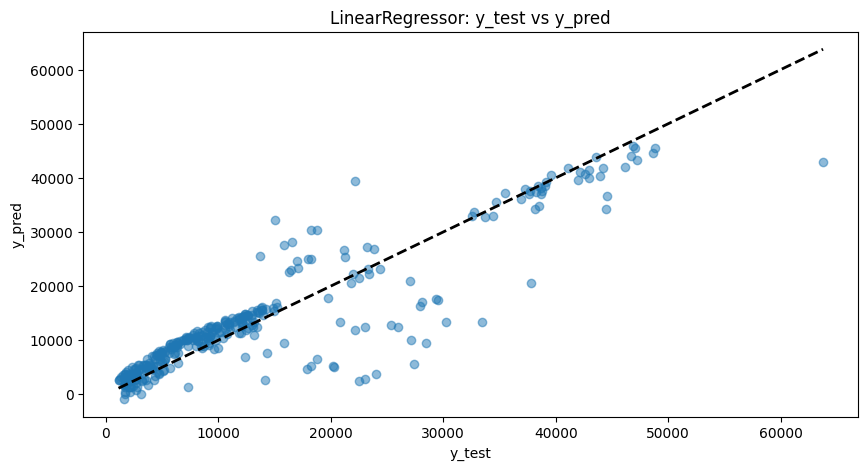

In [63]:
#Code

l_reg.fit(X_train,y_train)
print(l_reg.score(X_test,y_test))

y_pred_lr = l_reg.predict(X_test)
view(y_test, y_pred_lr)

Q4: 经过特征工程的实验结果与特征选择相比有何不同？请给出解释。

Answer：相比 $R^2$ 有所上升，即预测效果提升。可能的原因有：

* 将连续变量离散化为类别变量，可能更好地捕捉了其与目标变量的非线性关系、提高了数据的可解释性。如不同年龄段的人群有不同的健康风险，这种风险在原始的连续年龄变量中可能不明显，更符合现实中保险公司定价前评估风险时的情况。同时，这也能减少异常值对线性回归模型的影响。
* 创建新特征捕捉了原有不同特征之间的非线性关系，增强了原始数据之间的特征间交互。

# MLP模型

除了线性回归模型以外，MLP也可用于回归任务。它由至少三层的节点组成：一个输入层，一个或多个隐藏层，以及一个输出层。每个节点（除输入节点外）都是一个带有非线性激活函数的神经元。其优点是能够学习非线性模型，可适用于较复杂的数据集。MLP的回归模型在sklearn中可通过[MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)实现。在Pytorch中使用[nn.Sequential()](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)堆叠线性层可实现。

创建一个MLPRegressor模型，输出其score, MSE, 并绘制散点图。你可以选择任何实现方式，以下仅给出PyTorch和sklearn的参考代码，只要实现一种即可。

提示：可尝试通过调整网络参数、增加训练迭代次数、正则化等方式提升性能。

In [64]:
# Pytorch version
import torch
import torch.nn as nn
from torch.nn import init
import torch.optim as optim
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm
from types import SimpleNamespace

device = "cuda" if torch.cuda.is_available() else "cpu"

configs = SimpleNamespace(**{
    'num_features': 8,
    'num_hidden_1': 256,
    'num_hidden_2': 64,
    'dropout_p': 0.2,
    'lr': 0.0005,
    'num_epoch': 20000
})

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

# 输入使用经过特征工程后的 8 个特征
model = nn.Sequential(
    nn.Linear(configs.num_features, configs.num_hidden_1),
    nn.ReLU(),
    nn.Linear(configs.num_hidden_1, configs.num_hidden_2),
    nn.ReLU(),
    nn.Dropout(configs.dropout_p),
    nn.Linear(configs.num_hidden_2, 1)
).to(device)

for param in model.parameters():
    init.normal_(param,mean=0,std=0.01)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=configs.lr)

progress = tqdm(range(configs.num_epoch), desc='Training Epochs')
for epoch in progress:
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        train_y_pred = model(X_train_tensor)
        r2_train = r2_score(y_train_tensor.cpu().numpy(), train_y_pred.cpu().numpy())
        mse_train = mean_squared_error(y_train_tensor.cpu().numpy(), train_y_pred.cpu().numpy())

    # tqdm.write(f'Epoch {epoch + 1}: train R2: {r2_train:.4f}, train MSE: {mse_train:.4f}')
    progress.set_description(f"Epoch {epoch + 1}/{configs.num_epoch} - train R2: {r2_train:.4f} - train MSE: {mse_train:.4f}")

# 测试模型
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    r2_test = r2_score(y_test_tensor.cpu().numpy(), outputs.cpu().numpy())
    mse_test = criterion(outputs, y_test_tensor).item()
print(f'Finally: train R2: {r2_test:.4f}, train MSE: {mse_test:.4f}')

Epoch 66/30000 - train R2: -1.2105 - train MSE: 320726976.0000:   0%|          | 50/30000 [00:00<01:56, 258.07it/s]

Epoch 30000/30000 - train R2: 0.8650 - train MSE: 19587472.0000: 100%|██████████| 30000/30000 [01:15<00:00, 395.58it/s]

Finally: train R2: 0.8577, train MSE: 21466348.0000


# CNN模型

CNN是一种深度学习模型，同样可以用作回归任务。它通过使用卷积层自动和适应性地学习空间层次结构，从而能够有效地处理具有高度空间相关性的数据。下文给出使用CNN模型的基本框架，请构建并训练你的神经网络，使得R² score达到0.7以上。你可以选择任何实现方式，以下仅给出PyTorch和TensorFlow的参考代码，只要实现一种即可。

In [71]:
# PyTorch version
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm
from types import SimpleNamespace

device = "cuda" if torch.cuda.is_available() else "cpu"

# 定义模型
class CNNRegressor(nn.Module):
    def __init__(self, input_size):
        super(CNNRegressor, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=2)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=2)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=2)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()

        # 计算全连接层的输入大小
        conv1_output_size = (input_size - 2 + 1)
        conv2_output_size = (conv1_output_size - 2 + 1)
        conv3_output_size = (conv2_output_size - 2 + 1)
        pool_output_size = (conv3_output_size - 2 + 1) // 2

        self.fc1 = nn.Linear(128 * pool_output_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

configs = SimpleNamespace(**{
    'lr': 0.0003,
    'num_epoch': 10000
})

# 准备数据
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

# 初始化模型
model = CNNRegressor(8).to(device)

# 损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=configs.lr)

# 训练模型
progress = tqdm(range(configs.num_epoch), desc='Training Epochs')
for epoch in progress:
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        train_y_pred = model(X_train_tensor)
        r2_train = r2_score(y_train_tensor.cpu().numpy(), train_y_pred.cpu().numpy())
        mse_train = mean_squared_error(y_train_tensor.cpu().numpy(), train_y_pred.cpu().numpy())

    progress.set_description(f"Epoch {epoch + 1}/{configs.num_epoch} - train R2: {r2_train:.4f} - train MSE: {mse_train:.4f}")

# 测试模型
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    r2_test = r2_score(y_test_tensor.cpu().numpy(), outputs.cpu().numpy())
    mse_test = criterion(outputs, y_test_tensor).item()
print(f'Finally: train R2: {r2_test:.4f}, train MSE: {mse_test:.4f}')

Training Epochs:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch 10000/10000 - train R2: 0.8733 - train MSE: 18381878.0000: 100%|██████████| 10000/10000 [00:33<00:00, 295.55it/s]

Finally: train R2: 0.8588, train MSE: 21304078.0000


Q5:请对比以上三种模型的结果，分析其优点及局限性。

Answer:

MLP 和 CNN 模型的效果较好、线性回归模型的效果稍差。

##### 线性回归：

* 优点：
  * 简单且易于解释：线性回归模型的原理简单，易于编程实现，且可解释性强
  * 计算效率高：计算速度快吗，可以在 CPU 上快速计算
* 局限性：
  * 对异常值敏感：线性回归对离群值较敏感，这可能影响模型的性能
  * 提取关系的能力有限：无法捕捉变量间的复杂非线性关系，并且需要借助特征工程。
  * 模型简单在此处同样也是局限性，这导致模型很容易欠拟合

##### MLP：
* 优点：
  * 处理非线性关系：MLP 可以学习输入特征间的复杂非线性关系，效果较好
  * 灵活性高：可以调整层数、神经元数，可以调整 MLP 避免欠拟合或过拟合
* 局限性：
  * 解释性差：与线性回归相比，MLP 的决策过程较难解释
  * 训练时间长：相比于线性回归，训练 MLP 需要较高的计算资源，并且依赖手动调节超参数

##### CNN:
* 优点：
  * 特征提取能力：CNN通过卷积层，相较 MLP 能更好地从数据中提取特征。
* 局限性
  * 超参数调整复杂：设计和优化CNN结构可能需要大量的实验和超参数调整。
  * 训练时间长：相比于 MLP，训练 CNN 可能需要更高的计算资源
在本场景中，数据不具有明显空间结构，使用 CNN 相较于 MLP 没有明显的效果提升